# The Spark Foundation 
# Author Jimy Patel
# Task 1 - Prediction using Supervised ML

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline 

In [2]:
url="http://bit.ly/w-data"
J_data = pd.read_csv(url)
print("The Data is imported successfully")
J_data.head(10)

The Data is imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
J_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [4]:
J_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# We have to predict the percentage of the student based on the number of hours the student studies 

# Data Visualization

Text(0, 0.5, 'percentage Score')

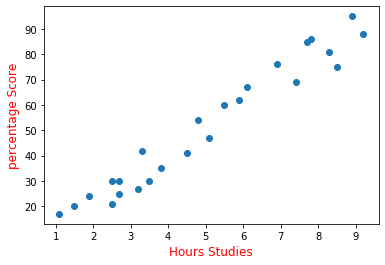

In [5]:
plt.scatter(J_data['Hours'],J_data['Scores'])
plt.xlabel('Hours Studies',color="red",size=12)
plt.ylabel('percentage Score',color="red",size=12)

# Data Preprocessing

In [6]:
x = J_data.iloc[:, :-1].values
y = J_data.iloc[:, 1].values

In [7]:
x.shape

(25, 1)

In [8]:
y.shape

(25,)

# Spliting the data using Train Test Split

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

# Training Linear Regression Model

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
print('Traning complete')

Traning complete


# ploting for test data

Train set score =
0.9504931730009657


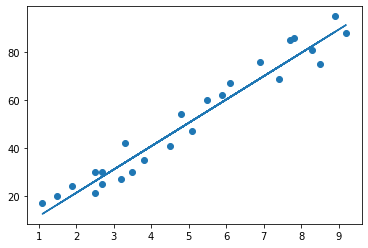

In [12]:
regression_line = model.coef_*x + model.intercept_
plt.scatter(x,y)
plt.plot(x, regression_line);
print("Train set score =")
print(model.score(x_train,y_train))
plt.show()

# Prediction for test dataset

In [13]:
y_pred = model.predict(x_test)
print(y_pred)

[88.44663283 77.73202788 12.47034316 73.83580789 33.89955306]


In [14]:
#comparing Actual v/s predicted 
J_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
J_data

,Actual,Predicted
0,95,88.446633
1,86,77.732028
2,17,12.470343
3,69,73.835808
4,42,33.899553


# Predicted score for student with study Hours = 9.25hrs/day

In [15]:
hours = 9.25
own_pred = model.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))
print("If a student Studies for {0} Hours then his score will be {1:.2f}%".format(hours,own_pred[0]))

No of Hours = 9.25
Predicted Score = 91.85582531626392
If a student Studies for 9.25 Hours then his score will be 91.86%


In [16]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test , y_pred))
print('R2 score:',metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 6.457450193167183
R2 score: 0.9466449081971943
